# Basic MDF processing.

In [39]:
from mdf_models import Channel, MDF, db

from pony.orm import *

TODO: Make this more descriptive for notebooks.

In [40]:
# Select the first MDF file
q = MDF.select()
# Get the first MDF indexed.
mdf_sql = q.first()
mdf_sql

MDF[1]

# List the channels in the file.

TODO: Make *this* more descriptive.

In [41]:
list(mdf_sql.channels)

[Channel[10],
 Channel[5],
 Channel[7],
 Channel[3],
 Channel[6],
 Channel[2],
 Channel[12],
 Channel[4],
 Channel[1],
 Channel[11],
 Channel[9],
 Channel[8]]

In [42]:
# For each of the channels in the MDF file:
for channel in mdf_sql.channels:
    # Print the channel name
    print(channel.name)

efficiency
transmission_gear
longitude
engine_speed_desired
coolant_temp
engine_speed
Y
vehicle_speed
time
X
power
latitude


In [43]:
channel.name

'latitude'

In [44]:
channel

Channel[8]

In [45]:
# Set of MDFs that have the channel above.
channel.mdfs

<MDFSet Channel[8].mdfs>

Get the channel for engine speed. 

In [46]:
engine_speed = Channel.select().filter(lambda channel: channel.name == "engine_speed").first()

In [47]:
engine_speed

Channel[2]

# Find MDFs missing channel 

MDFs missing engine speed:

In [48]:
bad_mdfs = list()
for mdf in MDF.select():
    if channel not in mdf.channels:
        bad_mdfs.append(mdf)

In [49]:
for bad_mdf in bad_mdfs:
    break

In [50]:
bad_mdf.path

'/projects/MDF_Data_Pipeline/Data/CarCompanyLLC/Boat/7218f46b-2da1-4722-a659-96b4bb197313.mdf'

In [51]:
bad_mdf.size_mb

20.00023365020752

In [52]:
bad_mdf.path

'/projects/MDF_Data_Pipeline/Data/CarCompanyLLC/Boat/7218f46b-2da1-4722-a659-96b4bb197313.mdf'

# Find MDF Files By Size

Big MDFs.

In [53]:
query = select(mdf for mdf in MDF
               if mdf.size_mb>1024)
query.count()

3

Medium MDFs.

In [54]:
query = select(mdf for mdf in MDF
               if mdf.size_mb<100 and mdf.size_mb>50)
query.count()

295

Small MDFs.

In [55]:
query = select(mdf for mdf in MDF
               if mdf.size_mb<1)
query.count()

1000

In [56]:
mdf_obj = query.first()
mdf_obj

MDF[1]

In [57]:
mdf_obj.path

'/projects/MDF_Data_Pipeline/Data/HeavyEquipmentInc/Airplane/5ab19863-6324-41b4-a7c0-387a38d00d3c.mf4'

In [58]:
mdf_obj.size

171256.0

In [59]:
mdf_obj.size_mb

0.16332244873046875

In [60]:
MDF

mdf_models.MDF

\#namespaces.

In [61]:
import asammdf

In [62]:
mdf = asammdf.MDF(mdf_obj.path)

In [63]:
asammdf.__version__

'5.20.0.dev2'

In [64]:
mdf.channels_db

{'time': ((0, 0),),
 'engine_speed': ((0, 1),),
 'engine_speed_desired': ((0, 2),),
 'vehicle_speed': ((0, 3),),
 'transmission_gear': ((0, 4),),
 'coolant_temp': ((0, 5),),
 'longitude': ((0, 6),),
 'latitude': ((0, 7),),
 'power': ((0, 8),),
 'efficiency': ((0, 9),),
 'X': ((0, 10),),
 'Y': ((0, 11),)}

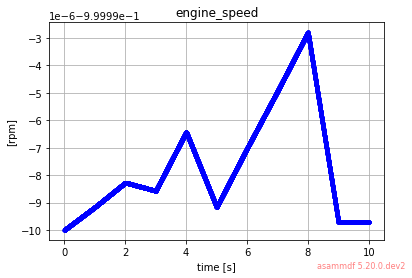

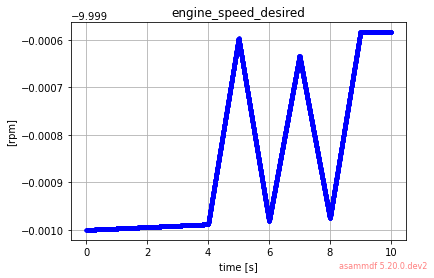

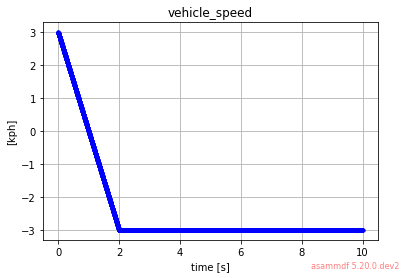

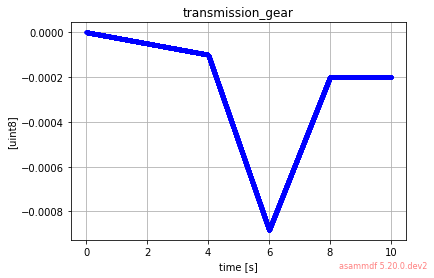

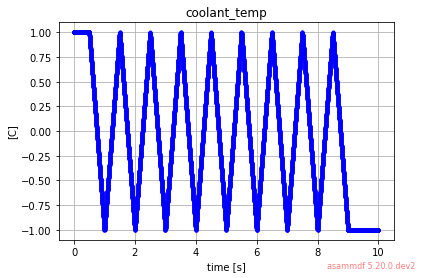

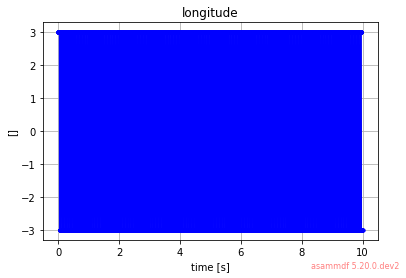

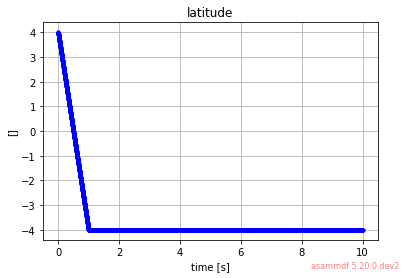

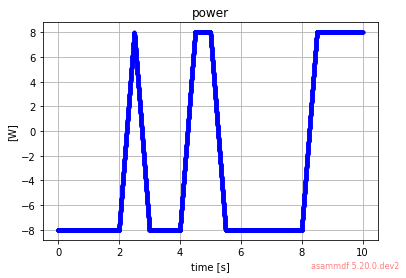

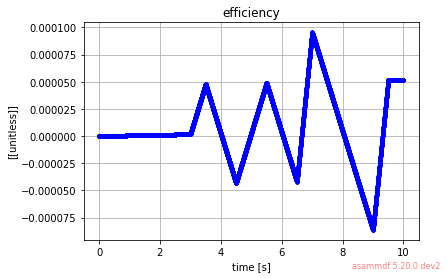

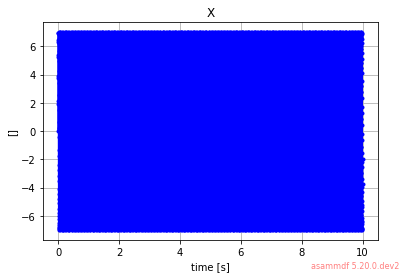

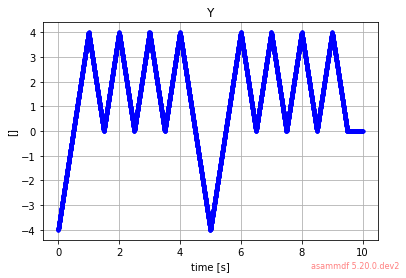

In [65]:
for channel in mdf.iter_channels():
    channel.plot()

In [66]:
import numpy as np

In [67]:
np.mean(np.diff(channel.timestamps))

0.0009992006145014896